# The ROC curve

First, let's build a simple linear model for illustration purposes (for classification we use logistic regression).

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd

from sklearn.metrics import auc
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_recall_curve as pc_curve
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm

from sklearn.tree import DecisionTreeClassifier

dataset = datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']

In [19]:
classification = DecisionTreeClassifier()
classification.fit(X[:300],y[:300])

prediction = classification.predict(X[300:])

In [20]:
print('Recall: '+str(recall(y[300:],prediction)))
print('Precision: '+str(precision(y[300:],prediction)))
print('F1 score: '+str(f1(y[300:],prediction)))
print('Confusion matrix: \n'+str(cm(y[300:],prediction)))

Recall: 0.8866995073891626
Precision: 0.989010989010989
F1 score: 0.935064935064935
Confusion matrix: 
[[ 64   2]
 [ 23 180]]


## Precision-recall curve

Now let's make a precision-recall curve to check the trade-off between both metrics over different thresholds:

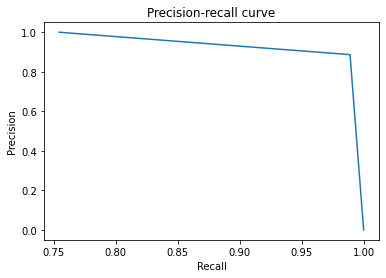

In [38]:
precision, recall, _ = pc_curve(y[300:],prediction)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

## ROC curve

y axis = TPR = (TP) / (FN + TP) = Sensitivity = Recall

x axis = FPR = (FP) / (FP + TN) = 1 - specificity  

Thresholds:  [2 1 0]
fpr:  [0.         0.03030303 1.        ]
tpr:  [0.         0.88669951 1.        ]



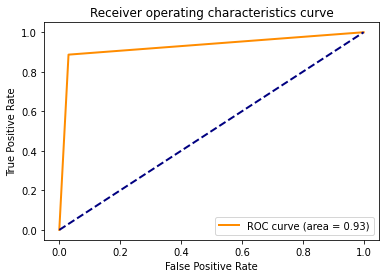

In [45]:
fpr, tpr, thresholds = roc(y[300:],prediction)
print('Thresholds: ', thresholds)
print('fpr: ', fpr)
print('tpr: ', tpr)
print()
roc_auc = auc(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color = 'darkorange',
        lw=2, label='ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc='lower right')
plt.show()

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1])